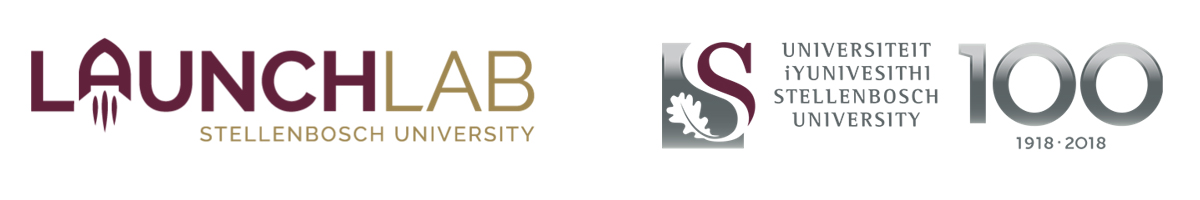

# Assignment \#7: Unsupervised Learning

In [390]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# install scikit image to import the following package
from skimage import io, color

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import NMF
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from IPython.display import Image

## Dimensionality reduction

We start of by doing PCA on the Iris dataset. This dataset represents measurements of 150 iris flowers, along with a response variable (target) indicating which of three iris species each set of measurements corresponds to. Once the data is loaded, these species (classes) are simply 0, 1, and 2.

The recorded attributes for an iris flower:

1. sepal length in cm

2. sepal width in cm

3. petal length in cm

4. petal width in cm

In [391]:
# Load dataset
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target
classes = set(labels)
target_names = iris_data.target_names
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Explore the dataset by plotting the sepal length against the sepal width.
Label the points according to their species.

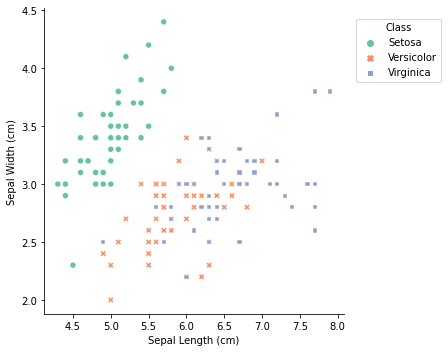

In [392]:
# Insert code
plot = sns.relplot(x= iris_data.data[:,0], y= iris_data.data[:,1], data= iris_data.data, 
            hue=iris_data.target, style=iris_data.target, palette = 'Set2', kind='scatter', facet_kws={'legend_out': False})

plot.set_xlabels('Sepal Length (cm)')
plot.set_ylabels('Sepal Width (cm)')

plot._legend.set_title('Class')
labels=['Setosa', 'Versicolor', 'Virginica']
for t, l in zip(plot._legend.texts, labels):
    t.set_text(l)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.25, .95))
plt.show(plot)

## Next, the data is fitted with PCA. 
First we fit with 3 principal components in order to investiage how much of the variance is explained by the components. 

Explain the meaning of the graph below.

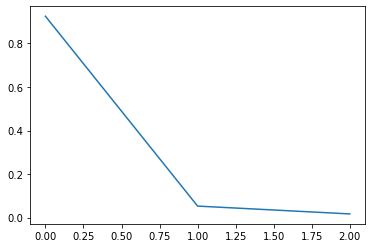

In [393]:
pca = PCA(n_components=3)
pca.fit(data)
plt.plot(pca.explained_variance_ratio_)
plt.show()

More than 90% of the variance is explained by the first component.

## Project the data onto the first two principal components 
Plot the 2-dimensional representation of the 3 classes in different colours. 

Your output should look similar to the image below.

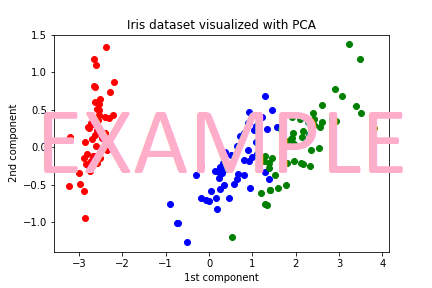

In [2]:
 # Example output
 display(Image(filename="src/iris_pca.png"))

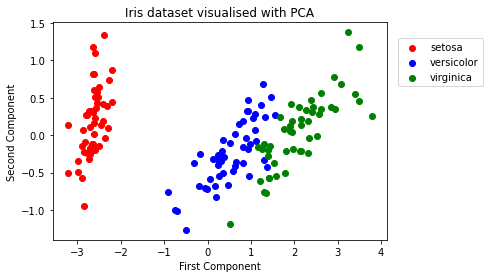

In [394]:
# Insert code to produce image above
target_ids = range(len(target_names))
X_pca = pca.transform(data)
colors = ['red', 'blue', 'green']
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[iris_data.target == i, 0], X_pca[iris_data.target == i, 1],
               c=c, label=label)
plt.legend(bbox_to_anchor=(1.3, .95))
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Iris dataset visualised with PCA')
plt.show()

Here we can see how much class separation is obtained by projecting onto the first two principal components. 

Calcualte the percentage information loss. [1 point]

Comment on whether you think this is a good projection. [2 points]

In [404]:
# Calculate % information lost
pca_var = pca.explained_variance_ratio_
information_loss = 100 - ((pca_var[0] + pca_var[1])*100)
print('Percentage information loss: ' + str(information_loss) + '%')

Percentage information loss: 2.2314793681205174%


It is a good projection as it has a very low information loss perecentage.

## Now use t-SNE to visualise iris dataset in 2-dimensional space.

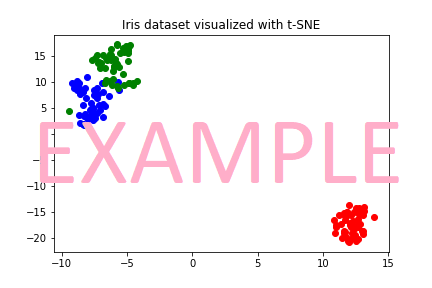

In [246]:
# Import library
from sklearn.manifold import TSNE

# Example output
display(Image(filename="iris_tsne.png"))

C:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



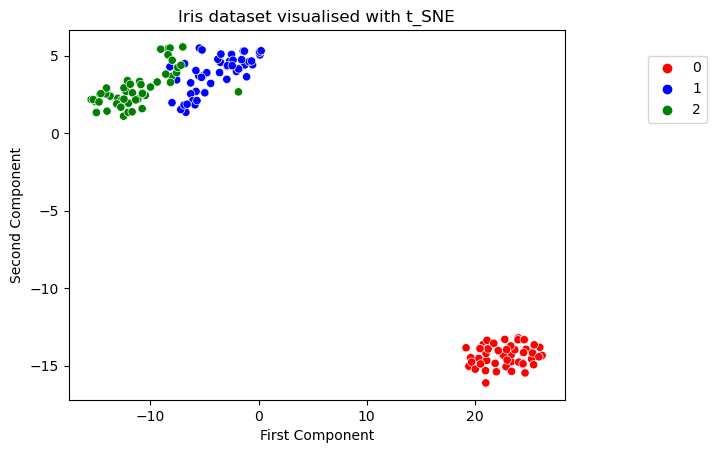

In [275]:
# Insert code produce a similar graph
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data) 
colors = ['red', 'blue', 'green']

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], data=X_tsne,
               hue=iris_data.target, palette=colors)

plt.legend(bbox_to_anchor=(1.3, .95))
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Iris dataset visualised with t_SNE')
plt.show()

## Discuss the main differences between PCA and t-SNE that leads to the two different plots.
PCA is a linear Dimensionality reduction technique and preserves the global structure of the data, while t-SNE is a non-linear Dimensionality reduction technique and preserves the local structure of the data.

## Clustering

Complete the class to implement the K-means algorithm.

## Function "fit()" 
Takes in d-dimensional data and applies the EM step to find and print the cluser centroids.

Initialize your means with random samples.

## Function "predict()"
Takes in a set of observations and predicts their labels based on the nearest cluster centroids.

Returns a list of predicted labels

In [405]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        # write code here
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
                
    def predict(self,data):
        # write code here
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

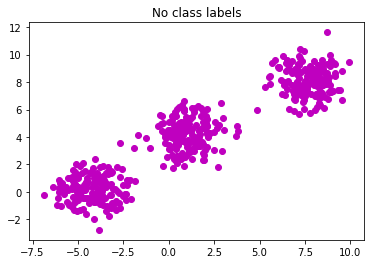

In [406]:
n_samples = 500
blobs = datasets.make_blobs(n_samples=n_samples, random_state=3)
blobs_data = blobs[0]
blobs_labels = blobs[1]

plt.title("No class labels")
plt.scatter(x=blobs_data[:,0], y=blobs_data[:,1], c="m")
plt.show()

## Apply your K-Means algorithm to the random generated dataset above
Plot the data, assigning a different colour to each cluster. 

Your result should look something like the image below.

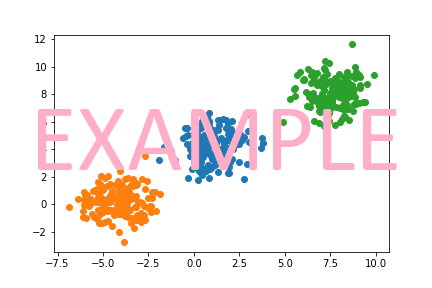

In [6]:
 # Example output
 display(Image(filename="src/my_pca.png"))

585.7229450828404
42.721637285124515
14.099533445521898
20.82761348281815
24.38437170610843
41.16156400992219
68.25217893084188
12.38086723111992
20.205698529972537
2.3011833426453294
7.447247308309856


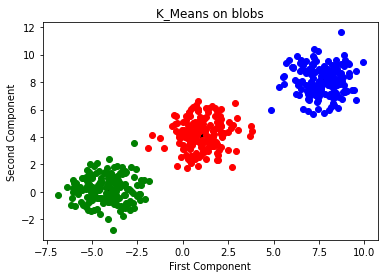

In [407]:
# Apply K-means on blobs_data
clf = K_Means()
clf.fit(blobs_data)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k")

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color)

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('K_Means on blobs')
plt.show()       

## Given the data distibution below, perform K-Means 
Use your own library or the scikit-learn implementation and plot the data showing the two clusters.

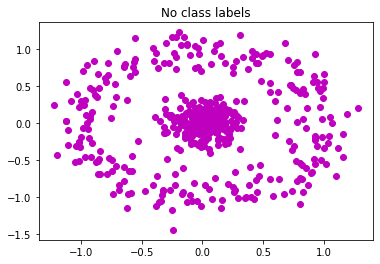

In [408]:
# Generate noisy cirlces
n_samples = 500
circles = datasets.make_circles(n_samples=n_samples, factor=.05, noise=.15, random_state=1)
circles_data = circles[0]
circles_labels = circles[1]

plt.title("No class labels")
plt.scatter(x=circles_data[:,0], y=circles_data[:,1], c="m")
plt.show()

360.63929013903714
93.52988253611728
21.249554289345816
49.820507368864085
0.9550900698670057
37.210201639249135
31.980025818515514
21.045689709480563
4.889762963868613
2.810747335440109


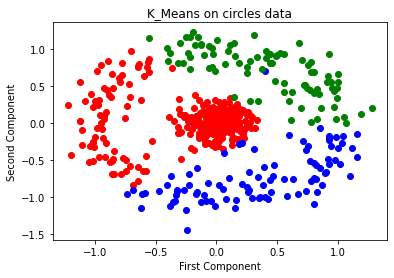

In [409]:
# Insert code for K-means on noisy circles
clf = K_Means()
clf.fit(circles_data)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="b")

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color)

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('K_Means on circles data')
plt.show()

## Comment on what you observe.
As Kmeans assumes spherical shapes of clusters it is not able to accurately cluster the circles data, but clusters the blobs data well.

## Now use DBSCAN clustering on the same data. 
Again, plot the result showing the cluster seperation. 

Hint: You need to tune the eps value. 

Your result should like something like the image below.

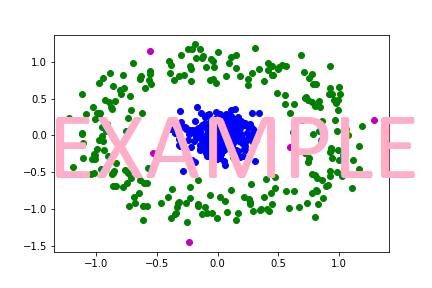

In [7]:
# Example output
display(Image(filename="src/dbscan.png"))

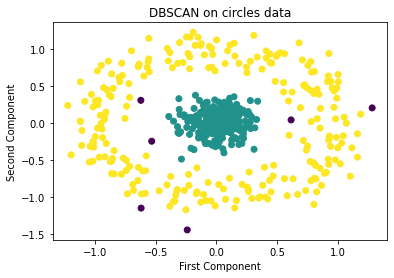

In [410]:
# Insert code here
db = DBSCAN(eps=0.24, min_samples=10).fit(circles_data)
labels = db.labels_
plt.scatter(circles_data[:,0], circles_data[:,1], c=labels)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('DBSCAN on circles data')
plt.show()

## Discuss the pros and cons for KMeans and DBSCAN.
The number of clusters needs to be deifned for KMeans, while the number of clusters do not need to be specified for DBSCAN. 
Kmens clustering may cluster loosley related observations together as every observation is included in one of the defined clusters, subsequently affecting the mean value of the cluster and the accuracu of the clustering. As the number of clusters is not specified for DBSCAN, observations that are far from the others or outliers are not included in clusters far from them and therefore produce more accurate clustering.

## Image compression Using dimension reduction


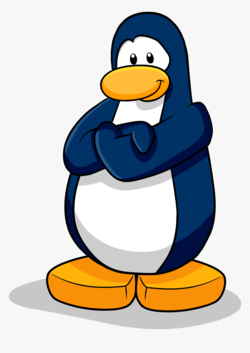

In [188]:
display(Image(filename="penguin.png"))

Note that the colors in the image above are clustered around only a few colors (whose values are stored in numerical variables). 

## Using the k-means algorith find the clusters and reprodue the image using only 4 colours (k=4). 

The result looks something like the image below.

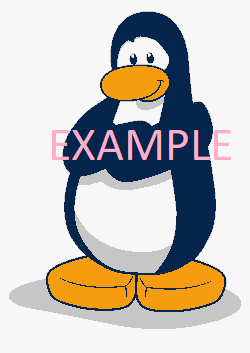

In [186]:
display(Image(filename="penguin_compressed.png"))

In [261]:
# Load image
image = io.imread("penguin.png")
# Convert from rgba to rgb
image = color.rgba2rgb(image)
# Show image dimension
print(image.shape)

(353, 250, 3)


In [268]:
# Insert code here


## Print the number of clusters required for a perfect reproduction.

In [74]:
# Insert code

## Hierarchical clustering
Now we will be performing hierarchical clustering on shopping data. 

The goal is to divide customers into dfferent groups based on their shopping trends. 

The data is located in "shopping-data.scv". First, let us explore the data.

In [411]:
# Load the data
customer_data = pd.read_csv("shopping-data.csv")

# Explore data
customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. 

## Extract the "Annual Income (k$)" and "Spending Score" columns as a two-dimensional numpy array. 
Print the first row

In [412]:
# Insert code to extract relevant data from relevant columns
income_score = np.array(customer_data[['Annual Income (k$)','Spending Score (1-100)']])

## Perform hierarchical clustering on the data
Plot the results in a dendogram.

Hint: use the scipy package imported shc

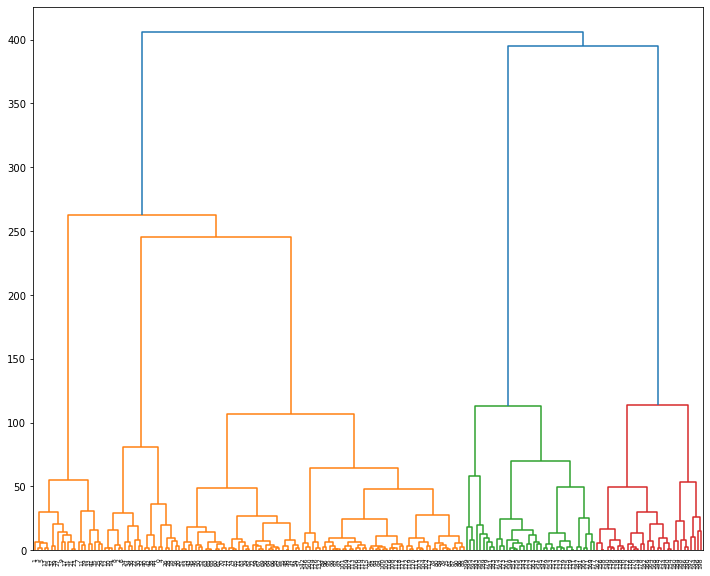

In [413]:
# Insert code here
plt.figure(figsize=(12, 10)) 
mergings = shc.linkage(income_score, method='ward')
shc.dendrogram(mergings,
leaf_rotation=90,
leaf_font_size=6, show_leaf_counts=True)
plt.show()

## Determine the number of clusters in which to split the data 
Thereafter, assign a cluster label to each data point (Using AgglomerativeClusting()).

Hint: The ideal number of clusters is present at a height of 150-200 in the dendogram.

In [414]:
# Insert code here
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(income_score)
df = pd.DataFrame(income_score)
df['labels'] = labels

## Plot "Annual Income (k$)" vs "Spending Score" clearly labeling the clusters.

Text(0, 0.5, 'Spending Score (1-100)')

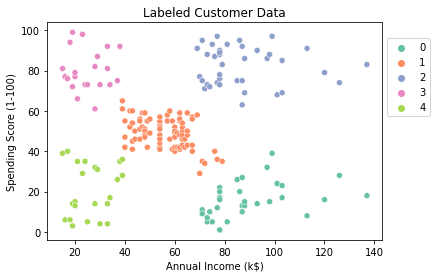

In [415]:
# Insert code here
g = sns.scatterplot(x=0, 
                y=1, 
                data=df, 
                hue=labels, palette = 'Set2')
g.set_title('Labeled Customer Data')
g.legend(bbox_to_anchor=(1., .95))
g.set_xlabel('Annual Income (k$)')
g.set_ylabel('Spending Score (1-100)')

## Identify two clusters of people you would target. Give a reason for your answer.
Cluster 2 as the customers have a high annual income and high spending.
Cluster 1 as there are a large amount of customers in this category.

## Non-negative matrix factorization
Let's apply NMF, using the tf-idf word-frequency array of Wikipedia articles. 

First explore the data. 

The data consist of a list of article titles and a list of words. The tf-idf word frequency of each word is given in a csr matrix called articles.

In [416]:
df_articles = pd.read_csv('wikipedia-vectors.csv', index_col=0)

# articles in csr matrix format
articles = csr_matrix(df_articles.transpose())
# article titles
titles = list(df_articles.columns)
# article keywords
words = pd.read_csv('wikipedia-vocabulary-utf8.txt', header=None).iloc[:, 0].tolist()

# For visualization
# Use raw (non csr matrix)
raw_articles = df_articles.transpose()
df = pd.DataFrame(raw_articles, index=titles)
df.columns = words
df.head()

,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zoo
HTTP 404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Alexa Internet,0.0,0.0,0.029607,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Internet Explorer,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.003772,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011594,0.000000,0.0
HTTP cookie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Google Search,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006649,0.0


## Now fit and transform the articles. First, create an NMF instance using 6 components.

In [417]:
# Insert code here 
model = NMF(n_components=6)

## Now fit the model to articles and transform to obtain the nmf_features.


In [418]:
# Insert code here
model.fit(articles)
nmf_features = model.transform(articles)

C:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


## Put the features in a pandas dataframe using the article titles as index.

In [419]:
# Insert code here
nmf_df = pd.DataFrame(norm_features, index=titles)

## Now that you have the features, display the 6 components for article with title "Zlatan Ibrahimović". 

In [423]:
# Insert code
print(nmf_df.loc['Zlatan Ibrahimović'])

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Zlatan Ibrahimović, dtype: float64


## Now display the 6 components for article with title "Neymar". 

In [424]:
# Insert code
print(nmf_df.loc['Neymar'])

0    0.017064
1    0.998503
2    0.000000
3    0.051974
4    0.000000
5    0.000000
Name: Neymar, dtype: float64


What do you observe? Explain what this mean.

Answer: Both are reconstructed using mostly the first component, meaning they have the words of the 3rd component in common.

Verify your assumption above by identifying the corresponding NMF components (i.e. the words that both articles have in common)

In [425]:
# Insert code here
components_df = pd.DataFrame(model.components_, columns=words)
component = components_df.iloc[1]
print(component.nlargest())

scored    0.487368
goal      0.383006
match     0.302858
cup       0.302835
goals     0.296412
Name: 1, dtype: float64
